In [1]:
from itertools import combinations, permutations
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from rules import divisiveness, win_rate, bootstrap, bootstrap2, bootstrap3, copeland
import math

In [7]:
N_PROFILE = 100
plot = None
for METHOD in ['IC','UM10','UM50']:
    df = pd.read_csv("data/experiment_1_method_%s_profile_%s.csv"%(METHOD,N_PROFILE))
    df['Methods'] = METHOD
    if type(plot) == None:
        plot = pd.DataFrame(columns=df.columns)
    plot = pd.concat([plot,df])  
    
plot.head()

,number_proposals,number_individuals,simulation,RANK(WR),RANK(COP),RANK(STD),RANK(DIV(WR)),RANK(DIV(COP)),"KT(WR,STD)","KT(WR,COP)","KT(WR,RANK(DIV(WR)))","KT(WR,RANK(DIV(COP)))","KT(RANK(DIV(WR)),STD)","KT(RANK(DIV(WR)),COP)","KT(RANK(DIV(WR)),RANK(DIV(COP)))","KT(RANK(DIV(COP)),STD)","KT(RANK(DIV(COP)),COP)","KT(RANK(DIV(COP)),RANK(DIV(WR)))",Methods
0,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 0, 1]","[2, 0, 1]","[0, 1, 2]",-0.333333,1.000000,-0.333333,-0.333333,1.0,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,IC
1,3,200,0,"[0, 1, 2]","[0, 1, 2]","[1, 2, 0]","[1, 2, 0]","[0, 1, 2]",-0.333333,1.000000,-0.333333,1.000000,1.0,-0.333333,-0.333333,-0.333333,1.000000,-0.333333,IC
2,3,300,0,"[0, 2, 1]","[0, 2, 1]","[0, 2, 1]","[0, 2, 1]","[0, 1, 2]",1.000000,1.000000,1.000000,0.333333,1.0,1.000000,0.333333,0.333333,0.333333,0.333333,IC
3,3,400,0,"[2, 1, 0]","[2, 0, 1]","[1, 2, 0]","[1, 2, 0]","[0, 1, 2]",0.333333,0.333333,0.333333,-1.000000,1.0,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,IC
4,3,500,0,"[0, 1, 2]","[0, 1, 2]","[0, 1, 2]","[0, 1, 2]","[0, 1, 2]",1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,IC


In [8]:
plot['Number of issues'] = plot['number_proposals']

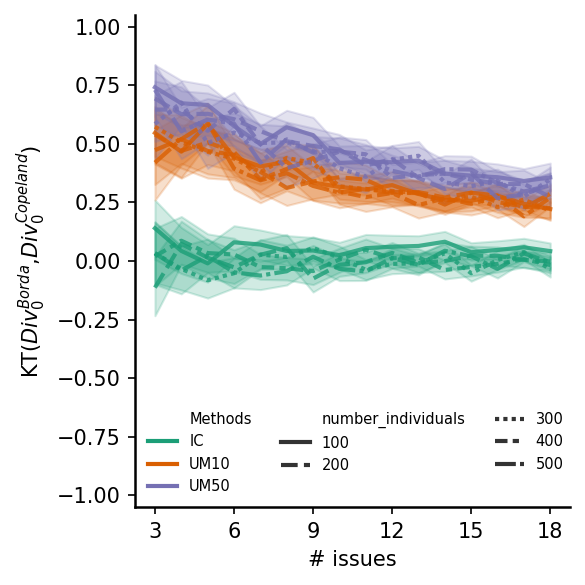

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=plot[(plot['number_proposals'].isin(range(3,19)))].dropna(), \
             x='Number of issues', y='KT(RANK(DIV(WR)),RANK(DIV(COP)))',\
                 hue='Methods',
             linewidth=2, style='number_individuals',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)

leg = g.legend(title="", frameon=False, fontsize=7, ncol=3, loc='lower left')
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)


ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
import matplotlib.ticker as mticker
ax.xaxis.set_major_locator(mticker.MultipleLocator(3))
ax.set_ylabel("KT($\mathit{Div}_0^\mathit{Borda}$,$\mathit{Div}_0^\mathit{Copeland}$)")
ax.set_xlabel("# issues")
plt.tight_layout()
plt.savefig("figures/figure_5_A.pdf")

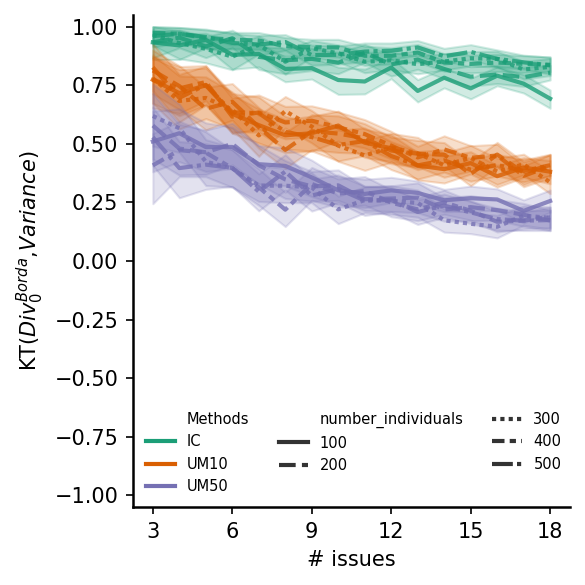

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=plot[(plot['number_proposals'].isin(range(3,19)))].dropna(), \
             x='Number of issues', y='KT(RANK(DIV(WR)),STD)',\
                 hue='Methods',
             linewidth=2, style='number_individuals',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)
leg = g.legend(title="", frameon=False, fontsize=7, ncol=3, loc='lower left')
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)


ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
import matplotlib.ticker as mticker
ax.xaxis.set_major_locator(mticker.MultipleLocator(3))
ax.set_ylabel("KT($\mathit{Div}_0^\mathit{Borda}$,$\mathit{Variance}$)")
ax.set_xlabel("# issues")
plt.tight_layout()
plt.savefig("figures/figure_5_B.pdf")

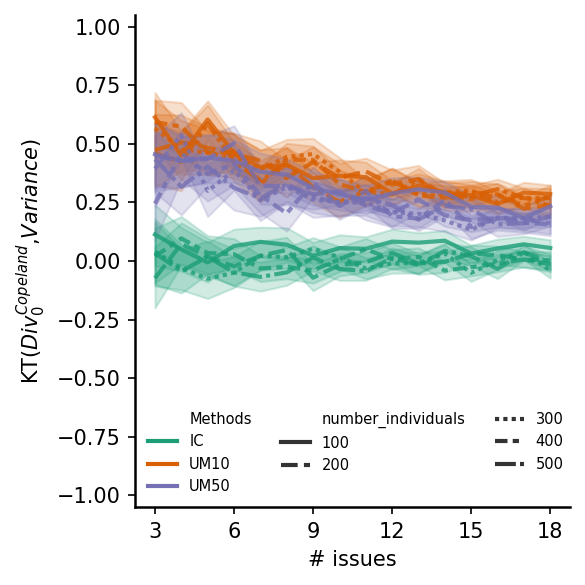

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=plot[(plot['number_proposals'].isin(range(3,19)))].dropna(), \
             x='Number of issues', y='KT(RANK(DIV(COP)),STD)',\
                 hue='Methods',
             linewidth=2, style='number_individuals',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)
leg = g.legend(title="", frameon=False, fontsize=7, ncol=3, loc='lower left')
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)


ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
import matplotlib.ticker as mticker
ax.xaxis.set_major_locator(mticker.MultipleLocator(3))
ax.set_ylabel("KT($\mathit{Div}_0^\mathit{Copeland}$,$\mathit{Variance}$)")
ax.set_xlabel("# issues")
plt.tight_layout()
plt.savefig("figures/figure_5_C.pdf")